In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import scipy.cluster.hierarchy as sc

In [2]:
# load the data files
demo = pd.read_csv("Data Files\Demographics.csv")
demo.head(5)

,Postcode,0-9 years,10-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60-69 years,70-79 years,80-89 years,...,Other Religions,Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation,Inadequately described,Not stated,Never married,Widowed,Divorced,Separated,Married,Not applicable
0,800,424,230,1939,1691,819,752,457,126,33,...,49,2294,48,1183,3034,76,458,177,2182,536
1,810,4840,3746,5181,6091,4882,3798,2861,1408,434,...,365,10122,219,4098,10521,892,2073,811,12254,6752
2,812,2753,2541,2504,2911,2696,2664,1862,734,190,...,136,5667,114,2292,5744,489,1289,507,6777,4069
3,820,2104,1803,3723,3812,2845,2442,1718,695,249,...,150,6751,135,2561,7171,446,1458,457,6860,3051
4,822,4381,4454,4081,4109,3443,2831,1613,532,109,...,1108,4253,60,3660,8203,854,940,500,8394,6664


In [3]:
#Shape of dataset (rows, columns)
demo.shape

(2472, 29)

In [4]:
demo.columns

Index(['Postcode', '0-9 years', '10-19 years', '20-29 years', '30-39 years',
       '40-49 years', '50-59 years', '60-69 years', '70-79 years',
       '80-89 years', '90-99 years', '100 years and over', 'Male', 'Female',
       'Buddhism', 'Christianity', 'Hinduism', 'Islam', 'Judaism',
       'Other Religions',
       'Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation',
       'Inadequately described', 'Not stated', 'Never married', 'Widowed',
       'Divorced', 'Separated', 'Married', 'Not applicable'],
      dtype='object')

<ipython-input-5-095bdfab554c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i);


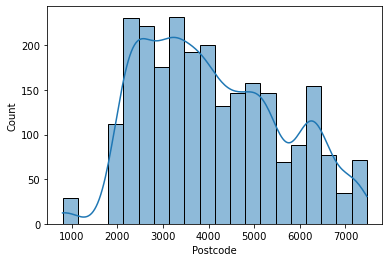

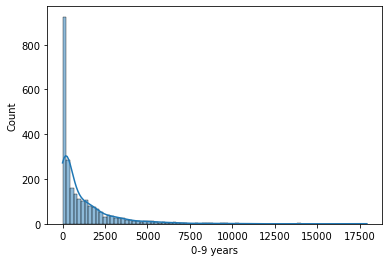

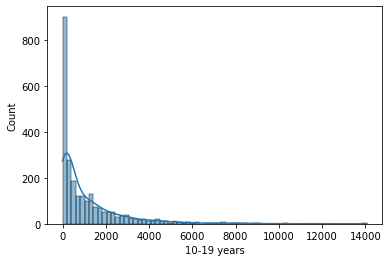

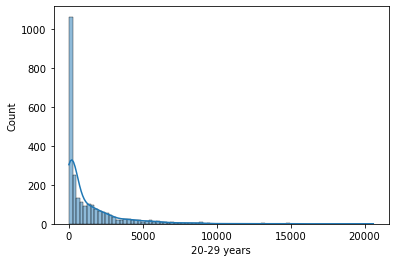

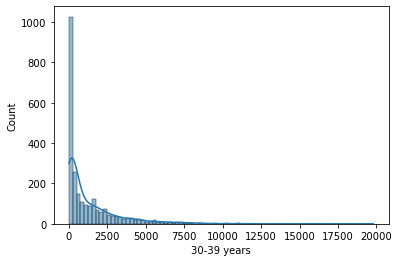

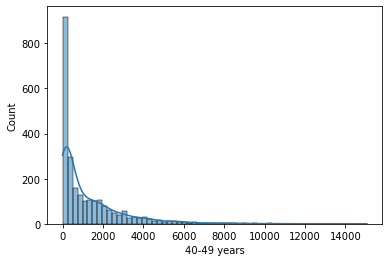

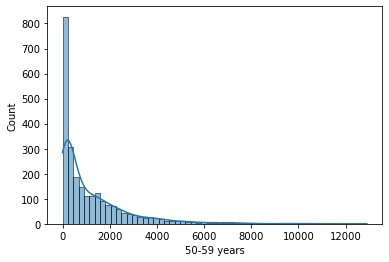

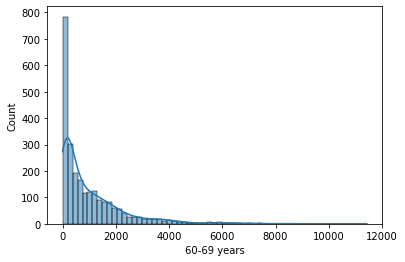

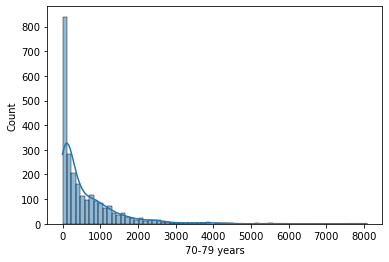

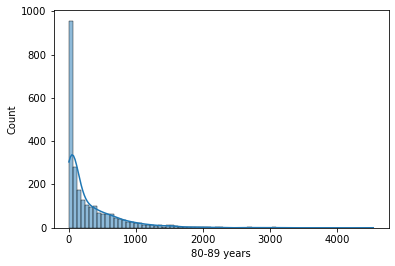

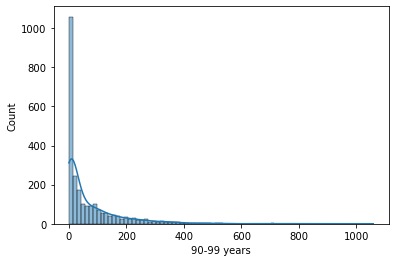

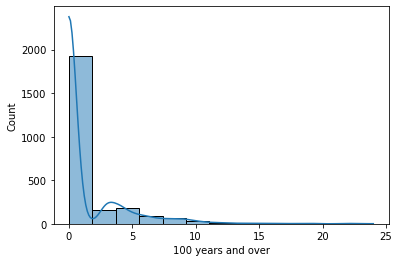

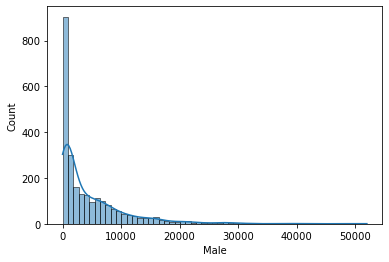

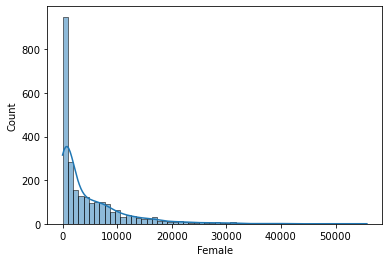

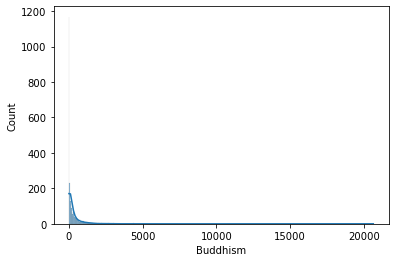

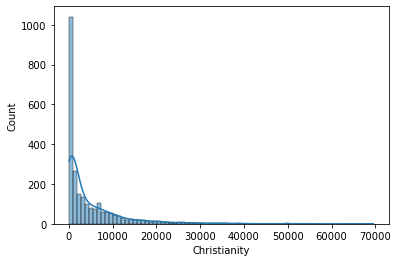

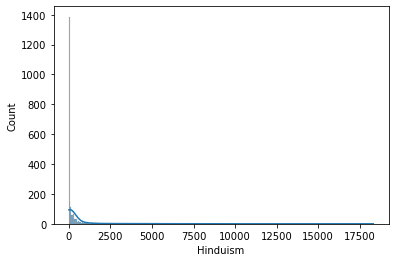

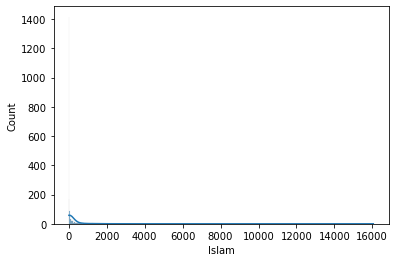

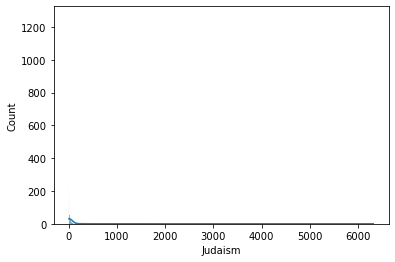

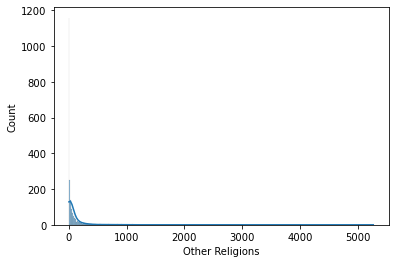

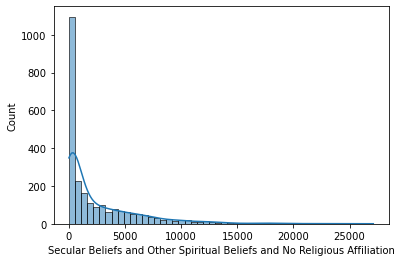

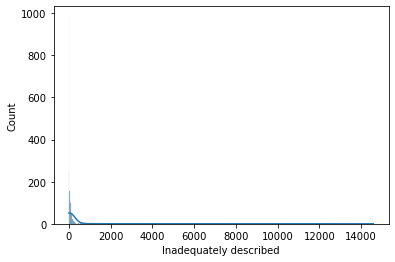

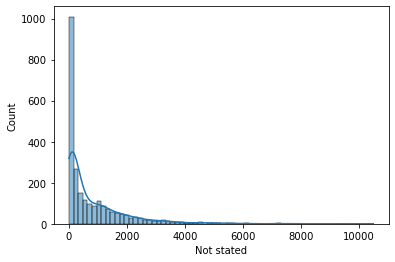

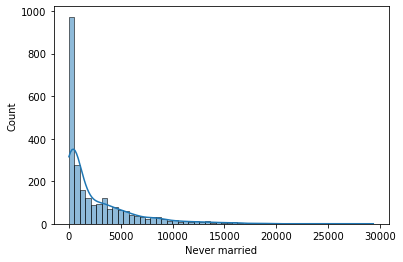

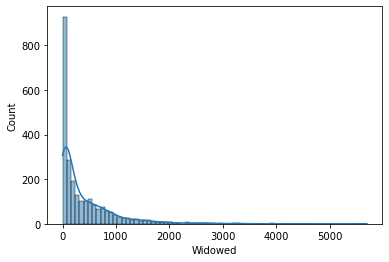

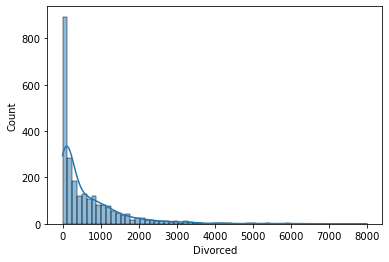

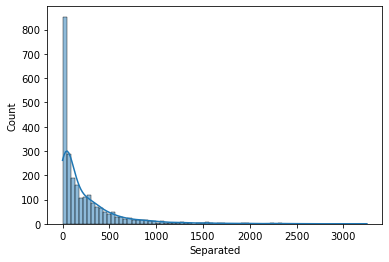

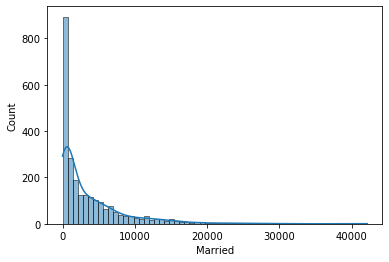

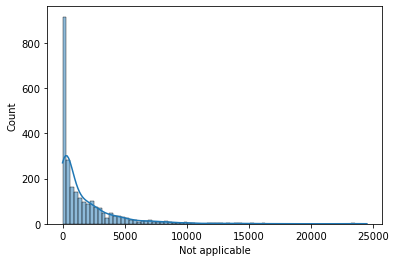

In [5]:
for i, col in enumerate(demo.columns):
    plt.figure(i);
    sns.histplot(demo[col],kde=True);

From the hisplots above, we can see that the data leftly skewed due to outliers. We will use boxplot to check for these outliers.

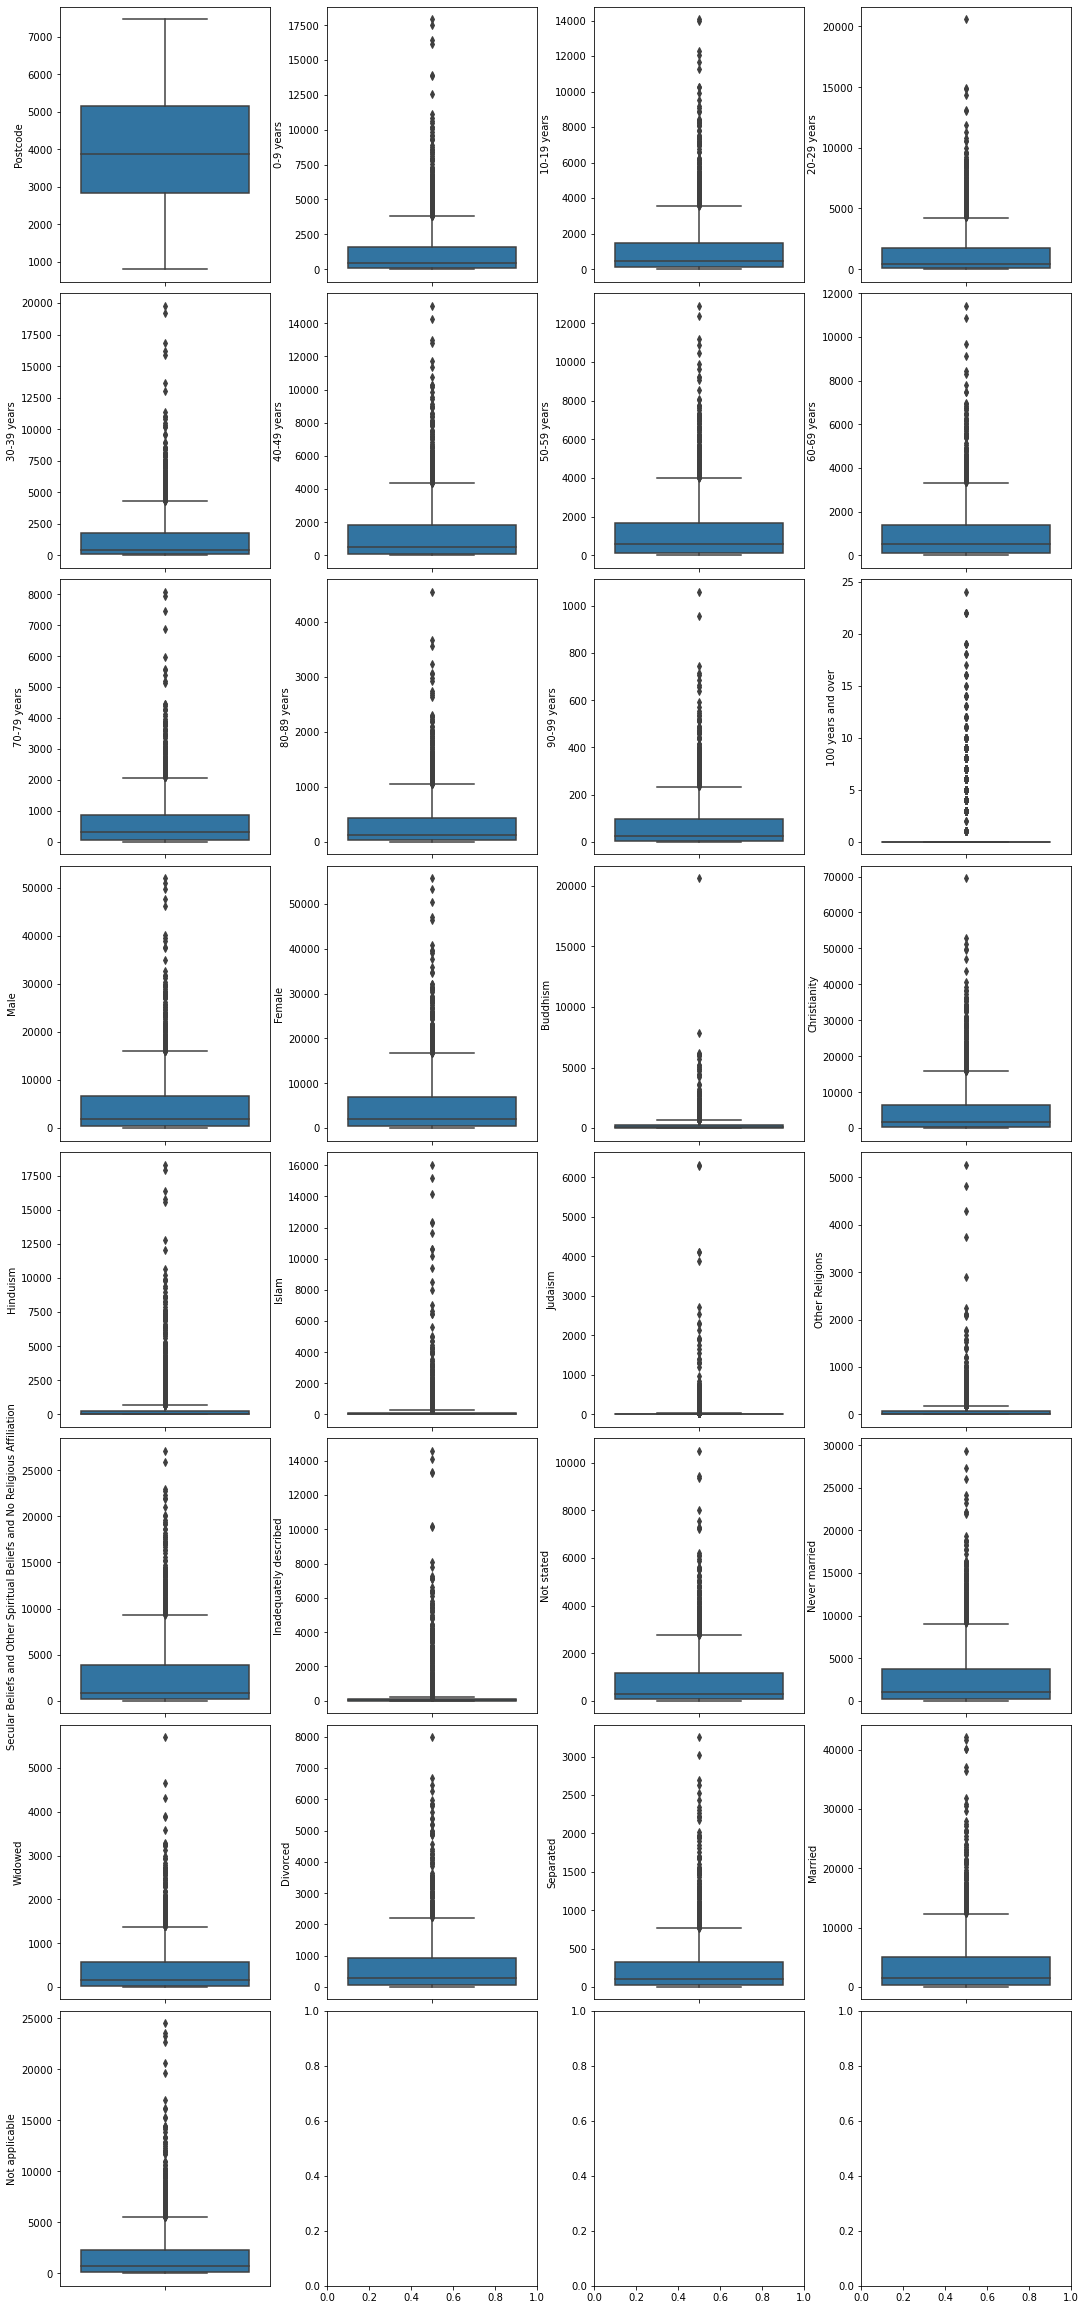

In [6]:
#Plotting boxplots to see if there are any outliers in our data 
fig, ax = plt.subplots(ncols=4, nrows=8, figsize=(15, 32))
ax = ax.flatten()
index = 0
for i in demo.columns:
  sns.boxplot(y=i, data=demo, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

## remove Outliers using IQR

as our data is skewely destributed so we should use IQR

In [9]:


#find Q1, Q3, and interquartile range for each column
Q1 = demo.quantile(q=.25)
Q3 = demo.quantile(q=.75)
IQR = demo.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
new_demo_clean = demo[~((demo < (Q1-1.5*IQR)) | (demo > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
print(new_demo_clean.shape)
new_demo_clean.head(5)

(1442, 29)


,Postcode,0-9 years,10-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60-69 years,70-79 years,80-89 years,...,Other Religions,Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation,Inadequately described,Not stated,Never married,Widowed,Divorced,Separated,Married,Not applicable
0,800,424,230,1939,1691,819,752,457,126,33,...,49,2294,48,1183,3034,76,458,177,2182,536
5,828,109,286,167,134,147,173,138,47,9,...,20,390,10,234,421,24,83,40,389,243
6,829,37,113,789,405,283,162,45,15,0,...,0,338,15,1068,1046,12,45,54,638,48
7,830,3224,2488,2835,3134,2718,2075,1147,442,133,...,92,6461,118,2369,5905,352,1197,490,5750,4512
8,832,3164,1883,3120,3223,2141,1173,615,193,58,...,116,5636,114,1375,4816,185,792,333,5256,4197


In [10]:
print("old shape : ", demo.shape)
print("new shape : ", new_demo_clean.shape)


old shape :  (2472, 29)
new shape :  (1442, 29)


After removing oulier we can see difference on the shape of our data set

<AxesSubplot:>

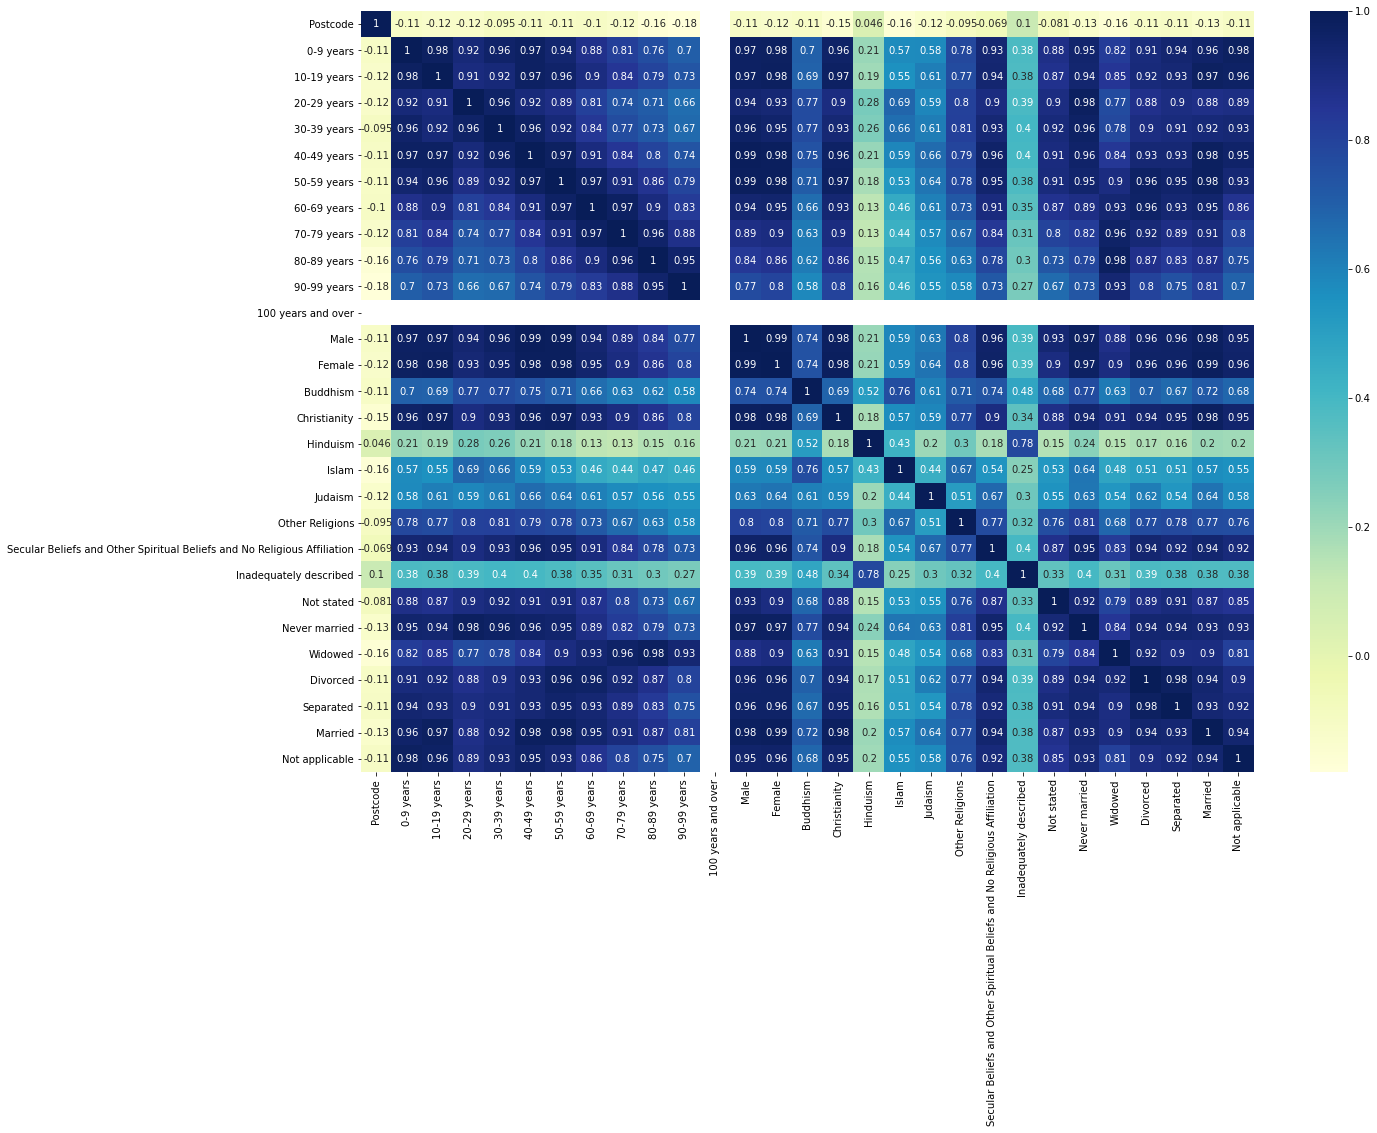

In [11]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,14))       
sns.heatmap(new_demo_clean.corr(),annot = True, cmap="YlGnBu")

In [13]:
new_demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 2471
Data columns (total 29 columns):
 #   Column                                                                    Non-Null Count  Dtype
---  ------                                                                    --------------  -----
 0   Postcode                                                                  1442 non-null   int64
 1   0-9 years                                                                 1442 non-null   int64
 2   10-19 years                                                               1442 non-null   int64
 3   20-29 years                                                               1442 non-null   int64
 4   30-39 years                                                               1442 non-null   int64
 5   40-49 years                                                               1442 non-null   int64
 6   50-59 years                                                               1442 n

In [14]:
# Make a copy of the data
new_demo = new_demo_clean.copy()

#Rename columns names
new_demo.rename(columns={'0-9 years': '0-9_y','10-19 years': '10-19_y',
                         '20-29 years': '20-29_y','30-39 years' : '30-39_y',
                         '40-49 years' : '40-49_y','50-59 years' : '50-59_y','60-69 years' : '60-69_y',
                         '70-79 years' : '70-79_y','80-89 years' : '80-89_y',
                         '90-99 years' : '90-99_y','100 years and over' : '100_y_and_over',
                         'Other Religions' : 'Other_Religions',
                         'Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation' : 'Secular_Spiritual_and_No Religious',
                         'Inadequately described' : 'Inadequately_described',
                         'Not stated' : 'Not_stated',
                         'Never married' : 'Never_married',
                         'Not applicable' :'Not_applicable'}, inplace=True)
new_demo.head(5)

,Postcode,0-9_y,10-19_y,20-29_y,30-39_y,40-49_y,50-59_y,60-69_y,70-79_y,80-89_y,...,Other_Religions,Secular_Spiritual_and_No Religious,Inadequately_described,Not_stated,Never_married,Widowed,Divorced,Separated,Married,Not_applicable
0,800,424,230,1939,1691,819,752,457,126,33,...,49,2294,48,1183,3034,76,458,177,2182,536
5,828,109,286,167,134,147,173,138,47,9,...,20,390,10,234,421,24,83,40,389,243
6,829,37,113,789,405,283,162,45,15,0,...,0,338,15,1068,1046,12,45,54,638,48
7,830,3224,2488,2835,3134,2718,2075,1147,442,133,...,92,6461,118,2369,5905,352,1197,490,5750,4512
8,832,3164,1883,3120,3223,2141,1173,615,193,58,...,116,5636,114,1375,4816,185,792,333,5256,4197


In [17]:
new_demo = new_demo.drop('100_y_and_over',axis =1)  

In [18]:
new_demo = new_demo.drop('Judaism',axis =1)  
new_demo.head()

,Postcode,0-9_y,10-19_y,20-29_y,30-39_y,40-49_y,50-59_y,60-69_y,70-79_y,80-89_y,...,Other_Religions,Secular_Spiritual_and_No Religious,Inadequately_described,Not_stated,Never_married,Widowed,Divorced,Separated,Married,Not_applicable
0,800,424,230,1939,1691,819,752,457,126,33,...,49,2294,48,1183,3034,76,458,177,2182,536
5,828,109,286,167,134,147,173,138,47,9,...,20,390,10,234,421,24,83,40,389,243
6,829,37,113,789,405,283,162,45,15,0,...,0,338,15,1068,1046,12,45,54,638,48
7,830,3224,2488,2835,3134,2718,2075,1147,442,133,...,92,6461,118,2369,5905,352,1197,490,5750,4512
8,832,3164,1883,3120,3223,2141,1173,615,193,58,...,116,5636,114,1375,4816,185,792,333,5256,4197


From the correlation matrix we will see two column  have less amount so we droped the columns

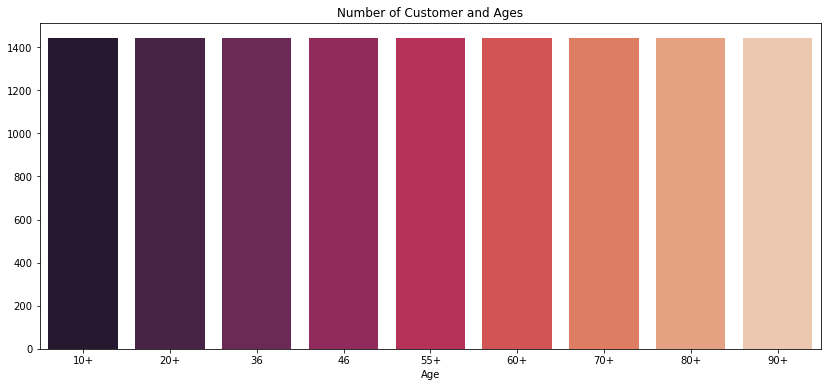

In [51]:
age10_ = new_demo['10-19_y']
age20_ = new_demo['20-29_y']
age30_ = new_demo['30-39_y']
age40_ = new_demo['40-49_y']
age50_ = new_demo['50-59_y']
age60_ = new_demo['60-69_y']
age70_ = new_demo['70-79_y']
age80_ = new_demo['80-89_y']
age90_ = new_demo['80-89_y']

x = ["10+","20+","36","46","55+","60+","70+","80+","90+"]
y = [len(age10_.values),len(age20_.values),len(age30_.values),len(age40_.values),
     len(age50_.values),len(age60_.values),len(age70_.values),len(age80_.values),len(age90_.values)]

plt.figure(figsize=(14,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.show()

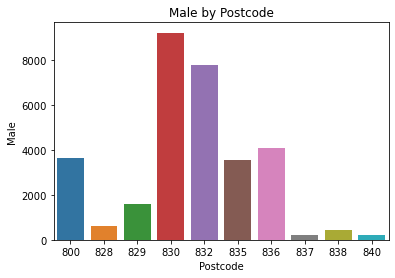

In [52]:
sns.barplot(data=new_demo.head(10), x="Postcode", y="Male")
plt.title('Male by Postcode')
plt.xlabel('Postcode')
plt.ylabel('Male')
plt.show()

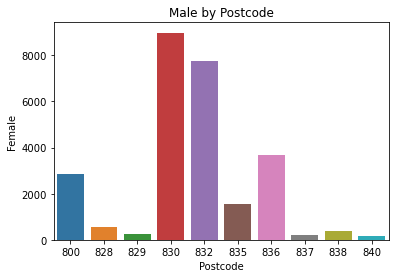

In [53]:
sns.barplot(data=new_demo.head(10), x="Postcode", y="Female")
plt.title('Male by Postcode')
plt.xlabel('Postcode')
plt.ylabel('Female')
plt.show()

Above bar diagram we can see that the male and female people are higher under 830 postcode

In [54]:
new_demo.shape

(1442, 27)

### Univariate Analysis

count    1442.000000
mean      380.186546
std       559.995434
min         0.000000
25%        53.250000
50%       147.000000
75%       433.000000
max      3558.000000
Name: 0-9_y, dtype: float64


(array([1009.,  208.,   73.,   51.,   37.,   28.,   17.,    9.,    5.,
           5.]),
 array([   0. ,  355.8,  711.6, 1067.4, 1423.2, 1779. , 2134.8, 2490.6,
        2846.4, 3202.2, 3558. ]),
 <BarContainer object of 10 artists>)

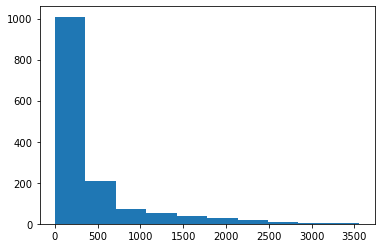

In [55]:
print(new_demo['0-9_y'].describe())
plt.hist(new_demo['0-9_y'])

count    1442.000000
mean      376.158114
std       542.552284
min         0.000000
25%        53.000000
50%       147.500000
75%       439.000000
max      3312.000000
Name: 10-19_y, dtype: float64


(array([979., 210., 100.,  50.,  33.,  26.,  21.,   9.,   8.,   6.]),
 array([   0. ,  331.2,  662.4,  993.6, 1324.8, 1656. , 1987.2, 2318.4,
        2649.6, 2980.8, 3312. ]),
 <BarContainer object of 10 artists>)

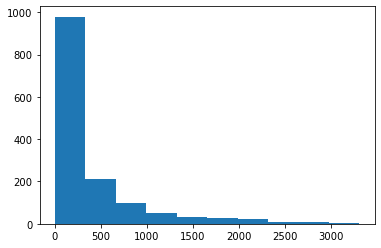

In [56]:
print(new_demo['10-19_y'].describe())
plt.hist(new_demo['10-19_y'])

count    1442.000000
mean      335.679612
std       515.976576
min         0.000000
25%        40.000000
50%       121.500000
75%       380.500000
max      3418.000000
Name: 20-29_y, dtype: float64


(array([1060.,  164.,   78.,   56.,   31.,   19.,   17.,   11.,    4.,
           2.]),
 array([   0. ,  341.8,  683.6, 1025.4, 1367.2, 1709. , 2050.8, 2392.6,
        2734.4, 3076.2, 3418. ]),
 <BarContainer object of 10 artists>)

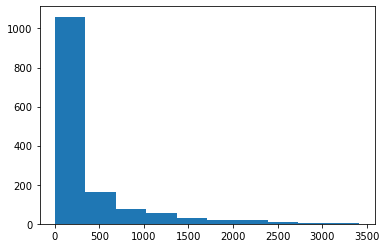

In [57]:
print(new_demo['20-29_y'].describe())
plt.hist(new_demo['20-29_y'])

count    1442.000000
mean      357.622746
std       538.585772
min         0.000000
25%        46.000000
50%       127.000000
75%       394.500000
max      3223.000000
Name: 30-39_y, dtype: float64


(array([1014.,  197.,   59.,   64.,   34.,   30.,   17.,   14.,    8.,
           5.]),
 array([   0. ,  322.3,  644.6,  966.9, 1289.2, 1611.5, 1933.8, 2256.1,
        2578.4, 2900.7, 3223. ]),
 <BarContainer object of 10 artists>)

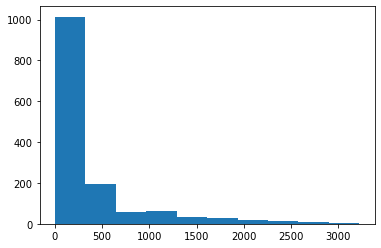

In [58]:
print(new_demo['30-39_y'].describe())
plt.hist(new_demo['30-39_y'])

count    1442.000000
mean      415.387656
std       585.726322
min         0.000000
25%        61.000000
50%       167.500000
75%       484.000000
max      3199.000000
Name: 40-49_y, dtype: float64


(array([937., 217., 100.,  51.,  42.,  29.,  29.,  18.,  11.,   8.]),
 array([   0. ,  319.9,  639.8,  959.7, 1279.6, 1599.5, 1919.4, 2239.3,
        2559.2, 2879.1, 3199. ]),
 <BarContainer object of 10 artists>)

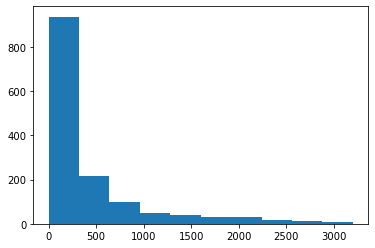

In [59]:
print(new_demo['40-49_y'].describe())
plt.hist(new_demo['40-49_y'])

count    1442.000000
mean      415.387656
std       585.726322
min         0.000000
25%        61.000000
50%       167.500000
75%       484.000000
max      3199.000000
Name: 40-49_y, dtype: float64


(array([937., 217., 100.,  51.,  42.,  29.,  29.,  18.,  11.,   8.]),
 array([   0. ,  319.9,  639.8,  959.7, 1279.6, 1599.5, 1919.4, 2239.3,
        2559.2, 2879.1, 3199. ]),
 <BarContainer object of 10 artists>)

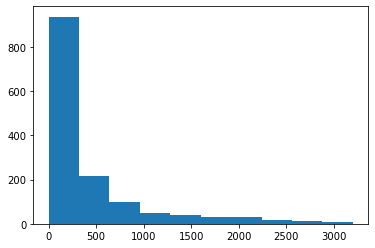

In [60]:
print(new_demo['40-49_y'].describe())
plt.hist(new_demo['40-49_y'])

count     1442.000000
mean      1205.726075
std       1632.037749
min          0.000000
25%        199.250000
50%        508.500000
75%       1490.000000
max      10350.000000
Name: Married, dtype: float64


(array([971., 212.,  90.,  60.,  35.,  34.,  24.,  11.,   4.,   1.]),
 array([    0.,  1035.,  2070.,  3105.,  4140.,  5175.,  6210.,  7245.,
         8280.,  9315., 10350.]),
 <BarContainer object of 10 artists>)

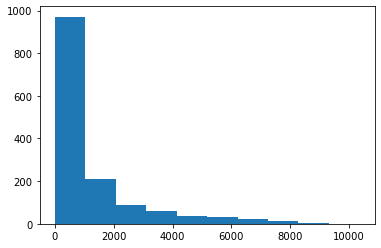

In [61]:
print(new_demo['Married'].describe())
plt.hist(new_demo['Married'])

count    1442.000000
mean      218.921637
std       294.563960
min         0.000000
25%        36.250000
50%        89.000000
75%       278.750000
max      1756.000000
Name: Divorced, dtype: float64


(array([938., 222., 106.,  60.,  33.,  36.,  24.,  13.,   8.,   2.]),
 array([   0. ,  175.6,  351.2,  526.8,  702.4,  878. , 1053.6, 1229.2,
        1404.8, 1580.4, 1756. ]),
 <BarContainer object of 10 artists>)

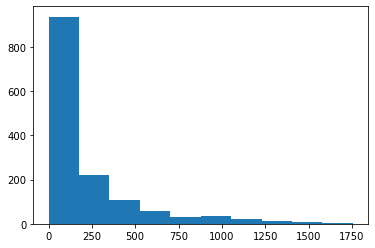

In [62]:
print(new_demo['Divorced'].describe())
plt.hist(new_demo['Divorced'])

count    1442.000000
mean       82.228155
std       111.985413
min         0.000000
25%        13.250000
50%        35.000000
75%       102.750000
max       752.000000
Name: Separated, dtype: float64


(array([968., 229.,  96.,  58.,  35.,  25.,  16.,  12.,   0.,   3.]),
 array([  0. ,  75.2, 150.4, 225.6, 300.8, 376. , 451.2, 526.4, 601.6,
        676.8, 752. ]),
 <BarContainer object of 10 artists>)

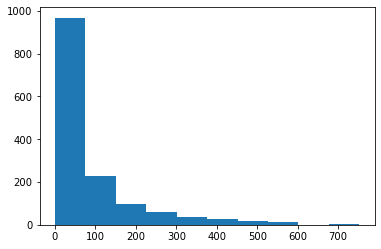

In [63]:
print(new_demo['Separated'].describe())
plt.hist(new_demo['Separated'])

count    1442.000000
mean      124.646325
std       175.464154
min         0.000000
25%        17.250000
50%        51.000000
75%       156.750000
max      1037.000000
Name: Widowed, dtype: float64


(array([949., 224., 102.,  62.,  22.,  33.,  21.,  14.,  10.,   5.]),
 array([   0. ,  103.7,  207.4,  311.1,  414.8,  518.5,  622.2,  725.9,
         829.6,  933.3, 1037. ]),
 <BarContainer object of 10 artists>)

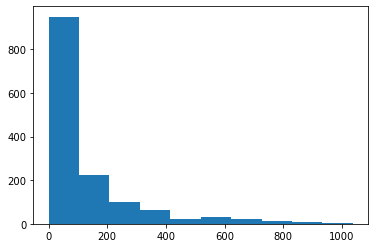

In [64]:
print(new_demo['Widowed'].describe())
plt.hist(new_demo['Widowed'])

## Exploring the dataset :Religion status

In [88]:
demo = pd.DataFrame(new_demo, columns = ['Postcode','Male', 'Female','Buddhism','Christianity','Hinduism','Islam','Other_Religions'])
demo.head()

,Postcode,Male,Female,Buddhism,Christianity,Hinduism,Islam,Other_Religions
0,800,3629,2835,274,2226,295,94,49
5,828,627,572,26,494,21,13,20
6,829,1578,264,10,399,4,6,0
7,830,9229,8979,423,8328,221,188,92
8,832,7811,7761,280,7478,341,228,116


In [90]:
new_demo.shape

(1442, 27)

<AxesSubplot:xlabel='Buddhism', ylabel='Count'>

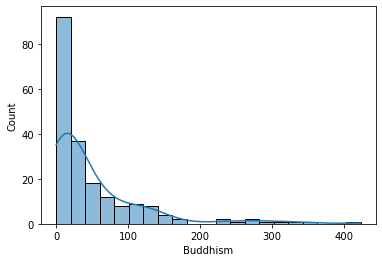

In [91]:
sns.histplot(data=new_demo.head(200), x="Buddhism", kde=True)

<AxesSubplot:xlabel='Christianity', ylabel='Count'>

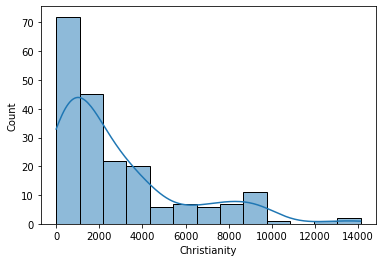

In [92]:
sns.histplot(data=new_demo.head(200), x="Christianity", kde=True)

<AxesSubplot:xlabel='Hinduism', ylabel='Count'>

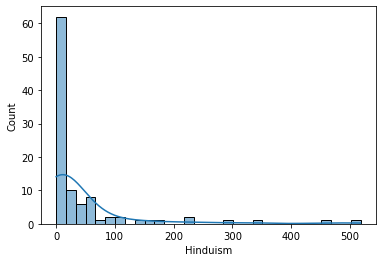

In [93]:
sns.histplot(data=new_demo.head(100), x="Hinduism", kde=True)

<AxesSubplot:xlabel='Islam', ylabel='Count'>

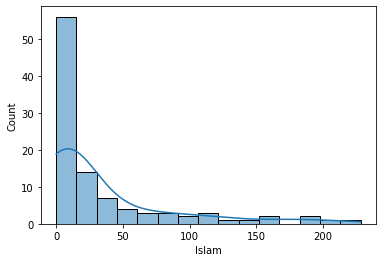

In [95]:
sns.histplot(data=demo.head(100), x="Islam", kde=True)

<AxesSubplot:xlabel='Other_Religions', ylabel='Count'>

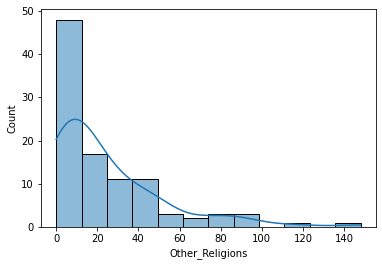

In [96]:
sns.histplot(data=demo.head(100), x="Other_Religions", kde=True)

In [97]:
demo.shape

(1442, 8)

In [98]:
demo.head(10).T

,0,5,6,7,8,9,10,11,12,13
Postcode,800,828,829,830,832,835,836,837,838,840
Male,3629,627,1578,9229,7811,3574,4076,223,442,216
Female,2835,572,264,8979,7761,1565,3677,190,379,144
Buddhism,274,26,10,423,280,70,131,9,17,6
Christianity,2226,494,399,8328,7478,2105,3460,150,356,174
Hinduism,295,21,4,221,341,14,4,0,0,0
Islam,94,13,6,188,228,20,20,0,0,0
Other_Religions,49,20,0,92,116,11,27,5,9,0


In [99]:
demo.sum()

Postcode           6163150
Male               2182057
Female             2162096
Buddhism             45161
Christianity       2402457
Hinduism             37558
Islam                16819
Other_Religions      19808
dtype: int64

## Exploring the dataset :Merital status

In [100]:
demo_m = pd.DataFrame(new_demo, columns = ['Postcode','Male', 'Female','Never_married','Widowed','Divorced','Separated','Married'])
demo_m.head()

,Postcode,Male,Female,Never_married,Widowed,Divorced,Separated,Married
0,800,3629,2835,3034,76,458,177,2182
5,828,627,572,421,24,83,40,389
6,829,1578,264,1046,12,45,54,638
7,830,9229,8979,5905,352,1197,490,5750
8,832,7811,7761,4816,185,792,333,5256


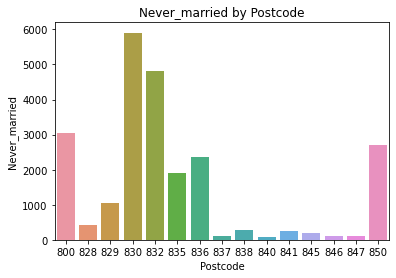

In [105]:
sns.barplot(data=demo_m.head(15), x="Postcode", y="Never_married")
plt.title('Never_married by Postcode')
plt.xlabel('Postcode')
plt.ylabel('Never_married')
plt.show()

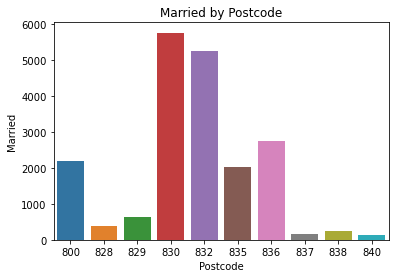

In [106]:
sns.barplot(data=demo_m.head(10), x="Postcode", y="Married")
plt.title('Married by Postcode')
plt.xlabel('Postcode')
plt.ylabel('Married')
plt.show()

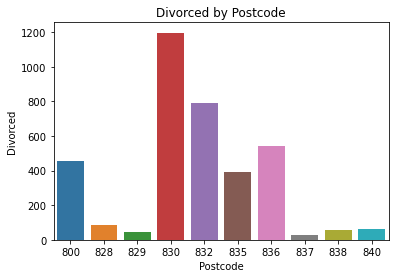

In [107]:
sns.barplot(data=demo_m.head(10), x="Postcode", y="Divorced")
plt.title('Divorced by Postcode')
plt.xlabel('Postcode')
plt.ylabel('Divorced')
plt.show()

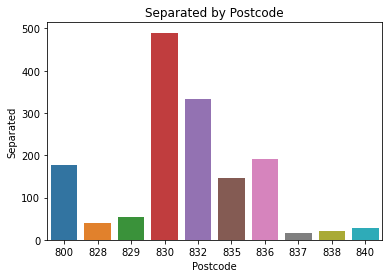

In [108]:
sns.barplot(data=demo_m.head(10), x="Postcode", y="Separated")
plt.title('Separated by Postcode')
plt.xlabel('Postcode')
plt.ylabel('Separated')
plt.show()

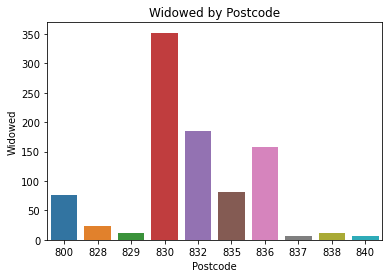

In [109]:
sns.barplot(data=demo_m.head(10), x="Postcode", y="Widowed")
plt.title('Widowed by Postcode')
plt.xlabel('Postcode')
plt.ylabel('Widowed')
plt.show()

The above barplot describes the marital status of people 

In [110]:
demo_m.describe()

,Postcode,Male,Female,Never_married,Widowed,Divorced,Separated,Married
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,4274.029126,1513.215673,1499.373093,785.398058,124.646325,218.921637,82.228155,1205.726075
std,1543.286389,2004.055723,2061.691123,1103.438265,175.464154,294.563960,111.985413,1632.037749
min,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3096.250000,250.000000,228.250000,113.000000,17.250000,36.250000,13.250000,199.250000
50%,3919.500000,663.500000,614.000000,321.500000,51.000000,89.000000,35.000000,508.500000
75%,5468.500000,1814.500000,1809.250000,926.750000,156.750000,278.750000,102.750000,1490.000000
max,7470.000000,10579.000000,11230.000000,6449.000000,1037.000000,1756.000000,752.000000,10350.000000


In [111]:
demo_m.sum()

Postcode         6163150
Male             2182057
Female           2162096
Never_married    1132544
Widowed           179740
Divorced          315685
Separated         118573
Married          1738657
dtype: int64

In [112]:
demo_m_head = demo_m.head(10)
demo_m_head

,Postcode,Male,Female,Never_married,Widowed,Divorced,Separated,Married
0,800,3629,2835,3034,76,458,177,2182
5,828,627,572,421,24,83,40,389
6,829,1578,264,1046,12,45,54,638
7,830,9229,8979,5905,352,1197,490,5750
8,832,7811,7761,4816,185,792,333,5256
9,835,3574,1565,1907,82,392,147,2033
10,836,4076,3677,2354,157,545,192,2748
11,837,223,190,119,6,28,16,153
12,838,442,379,284,12,55,20,257
13,840,216,144,93,7,61,29,140


<ipython-input-113-680f731054ec>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  demo_m_head.groupby("Postcode")['Never_married','Widowed','Divorced','Separated','Married'].agg(lambda x: sum(x)).plot(kind= "bar")


<Figure size 2160x1440 with 0 Axes>

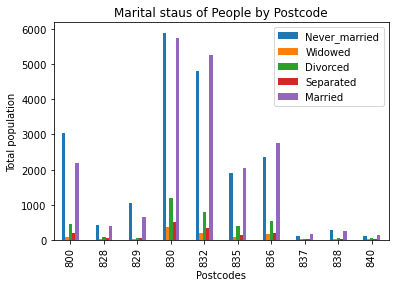

In [113]:
# Plotting Marital staus of People affiliation by first 10 postcode in Aus 

plt.figure(figsize= (30, 20))
demo_m_head.groupby("Postcode")['Never_married','Widowed','Divorced','Separated','Married'].agg(lambda x: sum(x)).plot(kind= "bar")
plt.title('Marital staus of People by Postcode')
plt.xlabel('Postcodes')
plt.xticks( rotation='vertical')
plt.ylabel('Total population')
plt.show()

### PCA ANALYSIS for marital status of people

In [137]:
new_demo.shape

(1442, 27)

In [141]:
X = new_demo.drop('Postcode',axis =1)  
y = new_demo['Postcode']

In [142]:
X.shape, y.shape

((1442, 26), (1442,))

In [144]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_data=scaler.fit_transform(X)
scaled_data

array([[ 0.07826609, -0.26948337,  3.10842912, ...,  0.846581  ,
         0.59840075, -0.04421154],
       [-0.48443364, -0.16623171, -0.32702673, ..., -0.37721703,
        -0.50060693, -0.39163628],
       [-0.61305072, -0.4852056 ,  0.87887256, ..., -0.25215738,
        -0.347984  , -0.62285753],
       ...,
       [-0.50408347, -0.56817569, -0.46273886, ..., -0.41294836,
        -0.58028959, -0.50309678],
       [-0.51122887, -0.54789412, -0.49569753, ..., -0.53800801,
        -0.59377435, -0.51139703],
       [-0.51122887, -0.54789412, -0.49569753, ..., -0.53800801,
        -0.59377435, -0.51139703]])

In [145]:
X.columns

Index(['0-9_y', '10-19_y', '20-29_y', '30-39_y', '40-49_y', '50-59_y',
       '60-69_y', '70-79_y', '80-89_y', '90-99_y', 'Male', 'Female',
       'Buddhism', 'Christianity', 'Hinduism', 'Islam', 'Other_Religions',
       'Secular_Spiritual_and_No Religious', 'Inadequately_described',
       'Not_stated', 'Never_married', 'Widowed', 'Divorced', 'Separated',
       'Married', 'Not_applicable'],
      dtype='object')

In [146]:
X_scaled_df = pd.DataFrame(scaled_data,columns=X.columns)

In [147]:
X_scaled_df.head()

,0-9_y,10-19_y,20-29_y,30-39_y,40-49_y,50-59_y,60-69_y,70-79_y,80-89_y,90-99_y,...,Other_Religions,Secular_Spiritual_and_No Religious,Inadequately_described,Not_stated,Never_married,Widowed,Divorced,Separated,Married,Not_applicable
0,0.078266,-0.269483,3.108429,2.476560,0.689319,0.594573,0.163036,-0.331307,-0.430131,-0.457187,...,1.517526,1.001085,0.774944,2.283754,2.038521,-0.277340,0.811916,0.846581,0.598401,-0.044212
1,-0.484434,-0.166232,-0.327027,-0.415348,-0.458372,-0.466865,-0.508864,-0.592038,-0.596263,-0.425297,...,0.269544,-0.405676,-0.298405,-0.161311,-0.330353,-0.573799,-0.461593,-0.377217,-0.500607,-0.391636
2,-0.613051,-0.485206,0.878873,0.087997,-0.226101,-0.487031,-0.704747,-0.697650,-0.658563,-0.584747,...,-0.591134,-0.444095,-0.157175,1.987460,0.236255,-0.642213,-0.590642,-0.252157,-0.347984,-0.622858
3,5.080041,3.893771,4.845544,5.156728,3.932572,3.019933,1.616360,0.711616,0.262088,0.116834,...,3.367982,4.079852,2.752164,5.339441,4.641291,1.296177,3.321580,3.642558,2.785383,4.670330
4,4.972861,2.778285,5.398087,5.322033,2.947129,1.366362,0.495826,-0.110181,-0.257076,-0.393407,...,4.400795,3.470305,2.639180,2.778435,3.654033,0.344085,1.946189,2.240103,2.482589,4.296819


In [148]:
pca = PCA(random_state=42)
pca.fit(scaled_data)

PCA(random_state=42)

In [149]:
pca.explained_variance_ratio_

array([7.99062673e-01, 7.27378476e-02, 4.17080909e-02, 3.04760142e-02,
       1.14141024e-02, 9.73783825e-03, 7.70282085e-03, 5.40956379e-03,
       5.18342794e-03, 3.90669642e-03, 2.97035830e-03, 2.36029135e-03,
       1.66582802e-03, 1.47617532e-03, 1.13063704e-03, 8.74485328e-04,
       5.67509724e-04, 4.65445627e-04, 3.14615322e-04, 2.92378914e-04,
       1.93239972e-04, 1.67783584e-04, 1.19693077e-04, 6.07693602e-05,
       1.54590134e-06, 1.67989482e-07])

Text(0, 0.5, 'second principal component')

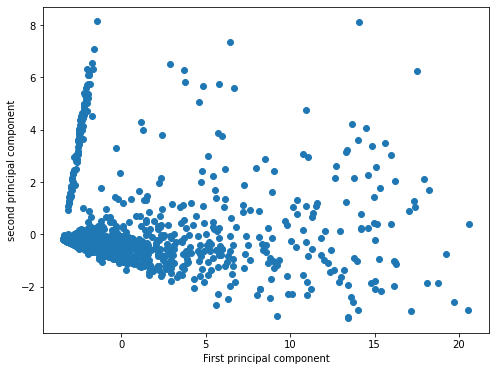

In [154]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data_demo[:,0],pca_data_demo[:,1])
plt.xlabel('First principal component')
plt.ylabel('second principal component')

In [159]:
pca.components_[0]

array([0.21108682, 0.21183051, 0.20469938, 0.20905529, 0.21445665,
       0.21531208, 0.20794842, 0.19903005, 0.19127081, 0.17825807,
       0.2178821 , 0.2183337 , 0.16973838, 0.21442473, 0.05550708,
       0.13611478, 0.17983841, 0.20954407, 0.09176873, 0.20087072,
       0.21353172, 0.20047348, 0.2123148 , 0.21125224, 0.21527864,
       0.20736745])

In [160]:
pca.explained_variance_ratio_

array([0.79906267, 0.07273785, 0.04170809, 0.03047601])

In [161]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.79906267, 0.87180052, 0.91350861, 0.94398463])

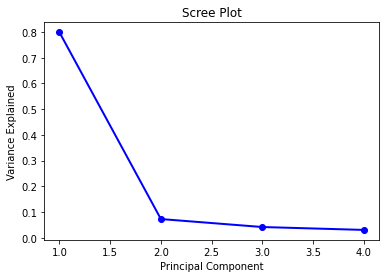

In [162]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

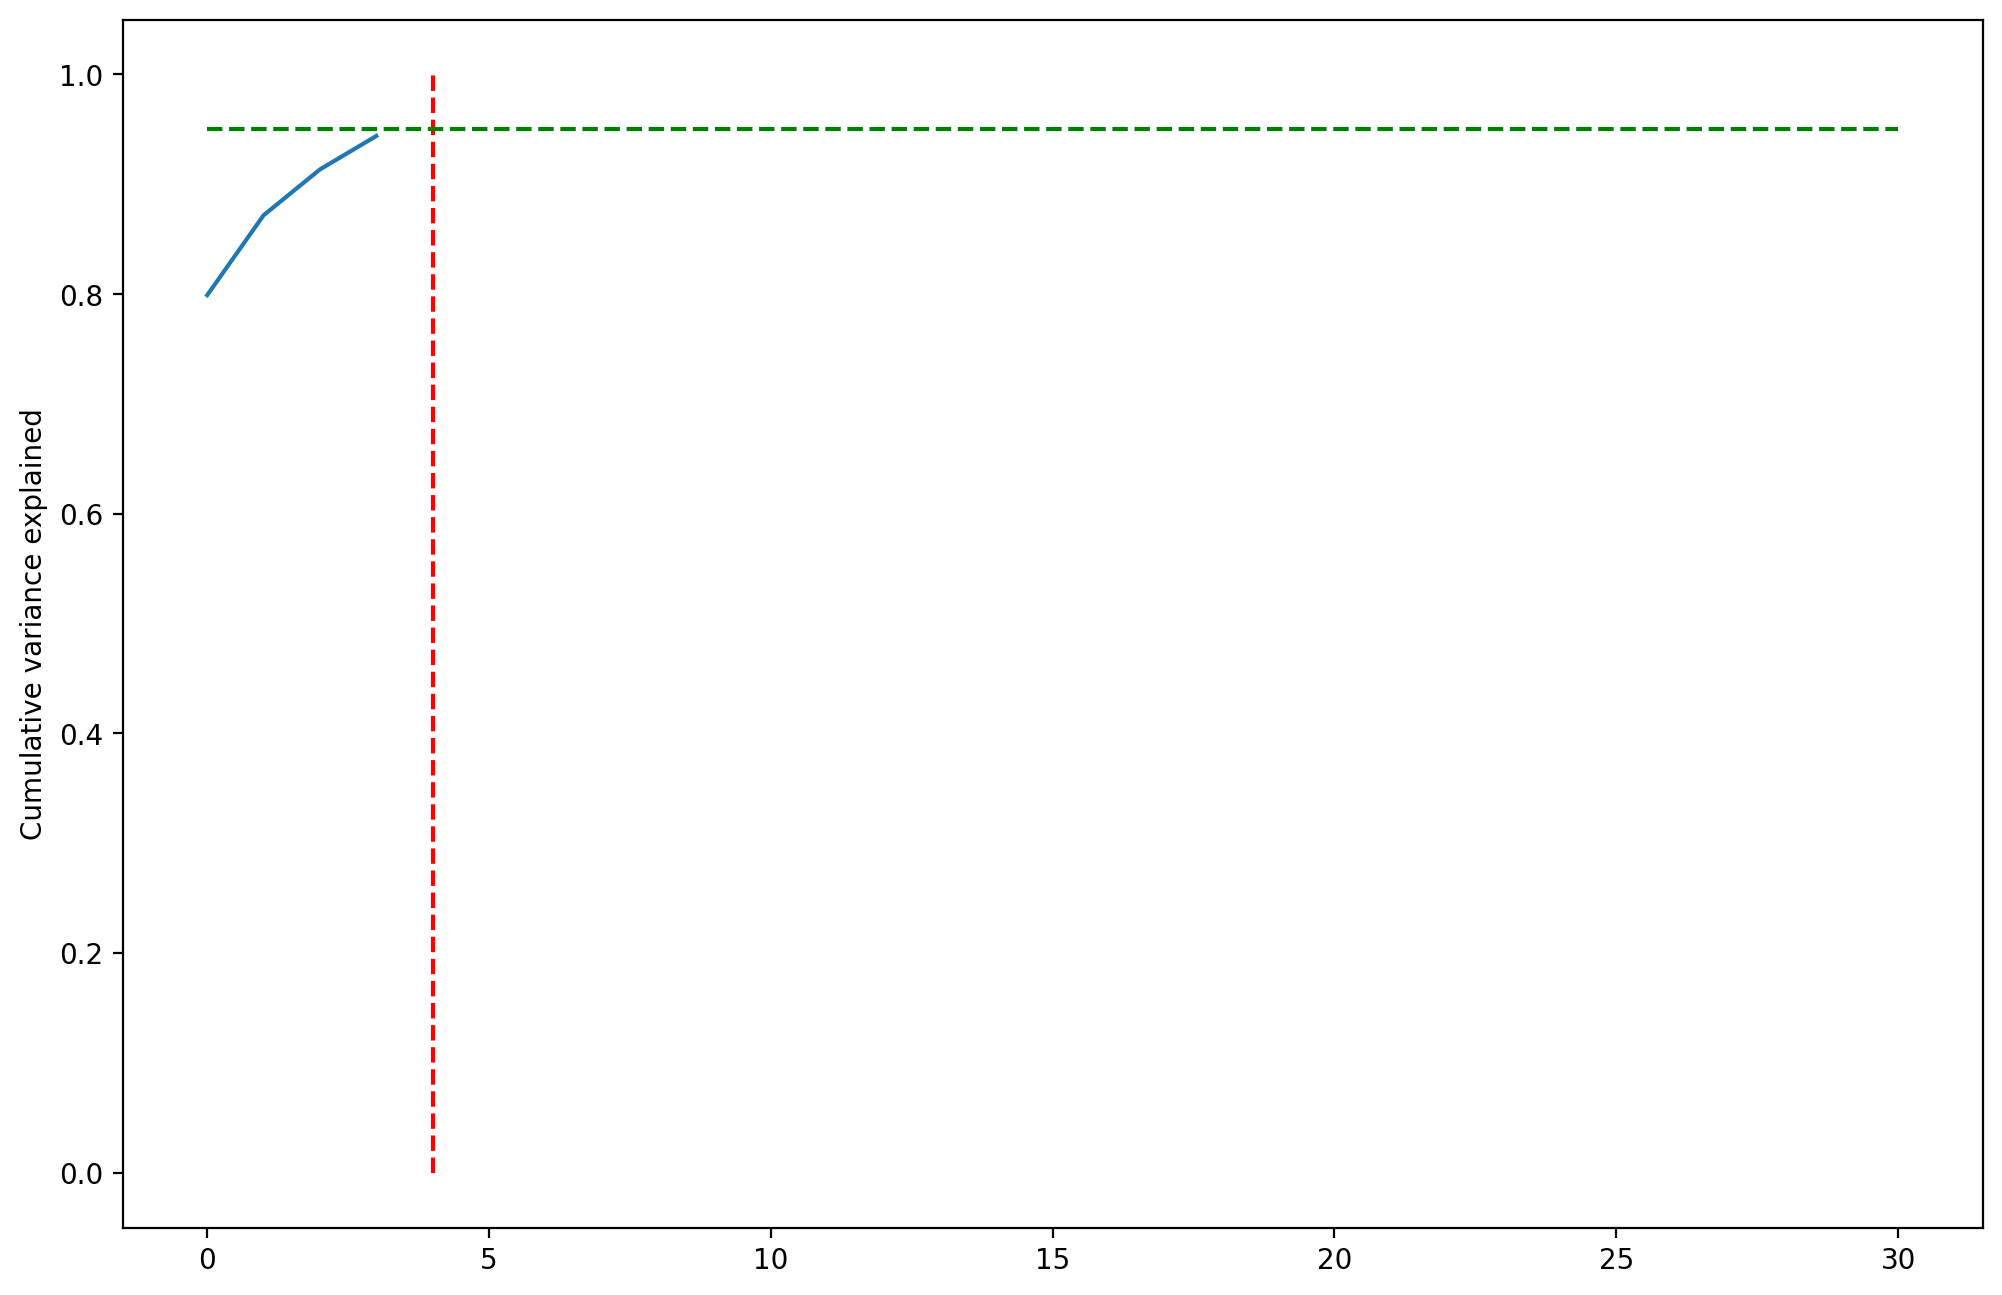

In [163]:

fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

From the scree plot flatening and Principal Components 4 and the cumulative variance of 90%, we have decided to go ahead with 4 Principal components for clustering

In [164]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [165]:
X_pca_final = pca_final.fit_transform(X_scaled)

NameError: name 'X_scaled' is not defined

### K means Clustering  - religion

In [ ]:
X = demo.iloc[:, [3, 4]].values

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Demo')
plt.show()

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of ')
plt.legend()
plt.show()